In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
fname='bmc-btor-sep30.csv'
df = pd.read_csv(fname)
# move timeout and unknown to maximal time
df['user'].fillna(value=900, inplace=True)
df['btor_time'].fillna(value=900, inplace=True)
# show a snapshot of data for visual validation
df.head()

,index,btor_time,real,status,sys,user
0,ldv-cat-0000.c.ite.gsa.smt2,0.0,0.0,sat,0.0,0.0
1,ldv-cat-0000.c.ite.phi.smt2,0.0,0.0,sat,0.0,0.0
2,ldv-cat-0000.c.noite.gsa.smt2,0.0,0.0,sat,0.0,0.0
3,ldv-cat-0000.c.noite.phi.smt2,0.0,0.0,sat,0.0,0.0
4,ldv-cat-0001.c.ite.gsa.smt2,900.0,0.0,unknown,0.0,0.0


In [21]:
# quick overview of solved/unsolved instances
df[['status','index']].groupby(['status']).count()

,index
status,
sat,116
unknown,175
unsat,103


In [22]:
# find all unknown results. Usually means that something went wrong, not just timeout
df.query('status == "unknown"')

,index,btor_time,real,status,sys,user
4,ldv-cat-0001.c.ite.gsa.smt2,900.0,0.00,unknown,0.00,0.00
5,ldv-cat-0001.c.ite.phi.smt2,900.0,0.00,unknown,0.00,0.00
6,ldv-cat-0001.c.noite.gsa.smt2,900.0,0.00,unknown,0.00,0.00
7,ldv-cat-0001.c.noite.phi.smt2,900.0,0.00,unknown,0.00,0.00
12,ldv-cat-0003.c.ite.gsa.smt2,900.0,0.00,unknown,0.00,0.00
...,...,...,...,...,...,...
387,ldv-cat-0097.i.ite.gsa.smt2,915.5,930.04,unknown,7.13,922.89
388,ldv-cat-0097.i.ite.phi.smt2,917.4,930.03,unknown,6.83,923.19
389,ldv-cat-0097.i.noite.gsa.smt2,914.0,930.04,unknown,7.59,922.41
390,ldv-cat-0097.i.noite.phi.smt2,898.9,930.31,unknown,40.35,889.94


In [23]:
# split results into 4 groups
def flt_index(df, s):
    return df[df['index'].str.contains(s)]

noite_gsa = flt_index(df, r'\.noite.gsa')
ite_gsa = flt_index(df, r'\.ite.gsa')
ite_phi = flt_index(df, r'\.ite.phi')
noite_phi = flt_index(df, r'\.noite.phi')

## Solved / Unsolved for each group

In [24]:
noite_gsa.groupby('status').count()

,index,btor_time,real,sys,user
status,,,,,
sat,32,32,32,32,32
unknown,41,41,41,41,41
unsat,26,26,26,26,26


In [25]:
ite_gsa.groupby('status').count()

,index,btor_time,real,sys,user
status,,,,,
sat,30,30,30,30,30
unknown,41,41,41,41,41
unsat,26,26,26,26,26


In [26]:
ite_phi.groupby('status').count()

,index,btor_time,real,sys,user
status,,,,,
sat,32,32,32,32,32
unknown,38,38,38,38,38
unsat,29,29,29,29,29


In [27]:
noite_phi.groupby('status').count()

,index,btor_time,real,sys,user
status,,,,,
sat,22,22,22,22,22
unknown,55,55,55,55,55
unsat,22,22,22,22,22


In [28]:
# create a file column to join different result sets
def index_to_file(df):
    return df.assign(file=df['index'].str.extract(r'([^.]+)'))
noite_phi = index_to_file(noite_phi)
ite_phi = index_to_file(ite_phi)
noite_gsa = index_to_file(noite_gsa)
ite_gsa = index_to_file(ite_gsa)

In [29]:
# join on file
phi = ite_phi.merge(noite_phi, on='file', suffixes=('_ite', '_noite'))

In [30]:
# solved / unsolved based on ite parameter
phi.groupby(['status_ite', 'status_noite']).count()[['file']]

file
status_ite status_noite      
sat        sat             22
           unknown         10
unknown    unknown         37
           unsat            1
unsat      unknown          8
           unsat           21

In [31]:
# merge gsa sets and show solved / unsolved
gsa = ite_gsa.merge(noite_gsa, on='file', suffixes=('_ite', '_noite'))
gsa.groupby(['status_ite', 'status_noite']).count()[['file']]

file
status_ite status_noite      
sat        sat             30
unknown    sat              1
           unknown         40
unsat      unsat           26

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


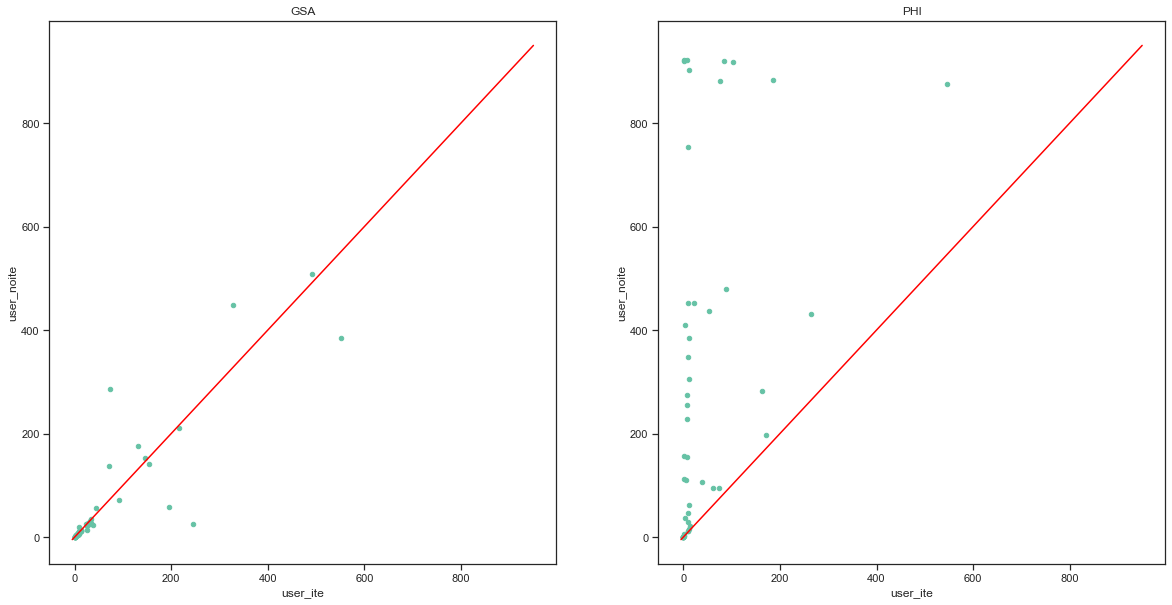

In [32]:
# set default figure size for plots to be 7 by 7 inches
plt.rcParams["figure.figsize"] = (7, 7)
# create a new figure 20 by 10 inches wide
fig = plt.figure(figsize=(20,10))
# break figure into two sub-plots
# ax1: the number '121' is parsed as plot 1 of 1x2 grid
ax1 = plt.subplot(121)
# ax2: the number '122' is parsed as plot 2 of 1x2 grid
ax2 = plt.subplot(122)
# plot a diagonal line to make scatter plots easier to read
x = np.linspace(-5, 950, 2)
ax1.plot(x, x, color='red')
ax2.plot(x, x, color='red')
# plot succeeded instances
gsa.query('status_ite=="sat" or status_ite=="unsat"').plot.scatter(x='user_ite', y='user_noite', ax=ax1, title='GSA')
phi.query('status_noite=="sat" or status_ite=="unsat"').plot.scatter(x='user_ite', y='user_noite', ax=ax2, title='PHI')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


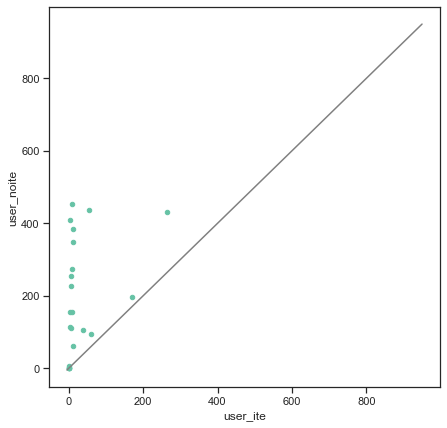

In [33]:
# a single plot is easier to create
ax = phi.query('status_noite=="sat"').plot.scatter(x='user_ite', y='user_noite')
ax.plot(x, x, color='grey')

In [34]:
# summary of the plot. Useful to validate what is visible from the picture
phi.groupby(['status_ite', 'status_noite'])[['user_ite', 'user_noite']].describe()

user_ite                                            \
                           count        mean         std     min       25%   
status_ite status_noite                                                      
sat        sat              22.0   30.687727   64.242872    0.00    2.0650   
           unknown          10.0  106.800000  267.878616    5.29   13.0775   
unknown    unknown          37.0  270.196486  420.814882    0.00    0.0800   
           unsat             1.0  851.890000         NaN  851.89  851.8900   
unsat      unknown           8.0  103.743750  183.423608    0.28    6.2900   
           unsat            21.0   29.462857   53.236301    0.00    0.1600   

                                                   user_noite              \
                             50%       75%     max      count        mean   
status_ite status_noite                                                     
sat        sat             7.310   11.5675  263.64       22.0  191.683636   
           unknown        18.945   38.6475  868.02       10.0  906.414000   
unknown    unknown         0.280  891.1800  924.63       37.0  262.295946   
           unsat         851.890  851.8900  851.89        1.0  444.290000   
unsat      unknown        43.740   88.4325  545.90        8.0  907.570000   
           unsat          10.090   12.7900  184.65       21.0  162.930476   

                                                                         \
                                std     min      25%      50%       75%   
status_ite status_noite                                                   
sat        sat           160.017191    0.00   69.530  155.295  328.9775   
           unknown        14.541365  883.60  898.125  910.380  916.8350   
unknown    unknown       408.804530    0.00    0.050    0.200  872.6300   
           unsat                NaN  444.29  444.290  444.290  444.2900   
unsat      unknown        18.964581  876.36  897.015  918.500  920.4075   
           unsat         265.626517    0.00    0.180   22.000  283.0700   

                                 
                            max  
status_ite status_noite          
sat        sat           452.81  
           unknown       923.36  
unknown    unknown       905.09  
           unsat         444.29  
unsat      unknown       922.61  
           unsat         883.14

In [35]:
# seaborn provides useful fancy plots
import seaborn as sns
sns.set(style='ticks', palette='Set2')

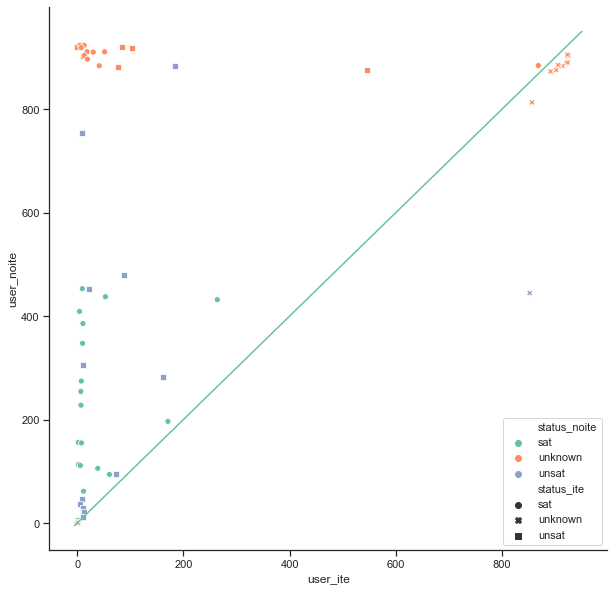

In [36]:
# use additional semantic features to separate sat/unsat instances
# there is a bug in display of the legend that only shows shapes but not colors
fig = plt.figure(figsize=(10,10))
g = sns.scatterplot(x="user_ite", y="user_noite", hue="status_noite", style='status_ite', data=phi);
sns.despine()
g.plot(x, x)


In [38]:
import plotly.express as px
fig = px.scatter(phi, x="btor_time_ite", y="btor_time_noite", color="status_noite", symbol="status_ite")
fig.show()

In [44]:
phi.query('time_noite < 50').sort_values('time_noite')

,index_ite,max_memory_ite,memory_ite,status_ite,time_ite,file,index_noite,max_memory_noite,memory_noite,status_noite,time_noite
1,ldv-cat-0001.c.ite.phi.smt2,3.31,3.01,unsat,0.01,ldv-cat-0001,ldv-cat-0001.c.noite.phi.smt2,3.32,3.01,unsat,0.01
2,ldv-cat-0002.c.ite.phi.smt2,3.37,3.13,unsat,0.01,ldv-cat-0002,ldv-cat-0002.c.noite.phi.smt2,3.37,3.13,unsat,0.01
3,ldv-cat-0003.c.ite.phi.smt2,3.31,3.01,unsat,0.01,ldv-cat-0003,ldv-cat-0003.c.noite.phi.smt2,3.31,3.01,unsat,0.01
4,ldv-cat-0004.c.ite.phi.smt2,3.45,3.14,unsat,0.01,ldv-cat-0004,ldv-cat-0004.c.noite.phi.smt2,3.45,3.14,unsat,0.01
5,ldv-cat-0005.c.ite.phi.smt2,3.74,3.43,unsat,0.01,ldv-cat-0005,ldv-cat-0005.c.noite.phi.smt2,3.74,3.43,unsat,0.01
6,ldv-cat-0006.c.ite.phi.smt2,3.74,3.46,unsat,0.01,ldv-cat-0006,ldv-cat-0006.c.noite.phi.smt2,3.75,3.45,unsat,0.01
7,ldv-cat-0007.c.ite.phi.smt2,4.13,3.87,unsat,0.02,ldv-cat-0007,ldv-cat-0007.c.noite.phi.smt2,4.22,3.97,unsat,0.01
8,ldv-cat-0008.c.ite.phi.smt2,6.36,5.40,unsat,0.03,ldv-cat-0008,ldv-cat-0008.c.noite.phi.smt2,6.23,5.34,unsat,0.03
25,ldv-cat-0025.c.ite.phi.smt2,20.35,16.28,unsat,0.10,ldv-cat-0025,ldv-cat-0025.c.noite.phi.smt2,20.21,16.77,unsat,0.11
11,ldv-cat-0011.c.ite.phi.smt2,38.06,12.29,unsat,0.26,ldv-cat-0011,ldv-cat-0011.c.noite.phi.smt2,49.03,16.74,unsat,0.57
